In [ ]:
# Code Snippet 1
# Installing Pycaret package for ML modeling
!pip install -U --pre pycaret

In [ ]:
# Code Snippet 2
# Importing Pandas for EDA
# Importing data from the URL
import pandas as pd
data = pd.read_csv('https://docs.google.com/spreadsheets/d/1XSBE7VwTJ-xB300r2JAwZesaAbGTLvMgS4qRxXfDjys/pub?gid=0&single=true&output=csv')
data

,Customer ID,Title,First Name,Middle Name,Last Name,Suffix,Street Address1,Street Address2,City-ZipCode-State,Birth Date,...,Occupation,Gender,Marital Status,Home Owner Status,Number of Cars Owned,Number of Children At Home,Total Number of Children,Annual Income,Avg Monthly Spend,eBook Subscriber Flag
0,11000,NaN,Jon,V,Yang,NaN,3761 N. 14th St,NaN,Cleveland-44101-Ohio,4/8/66,...,Professional,M,M,1,0,0,2,137947,89,0
1,11001,NaN,Eugene,L,Huang,NaN,2243 W St.,NaN,Seattle-98101-Washington,5/14/65,...,Professional,M,S,0,1,3,3,101141,117,1
2,11002,NaN,Ruben,NaN,Torres,NaN,5844 Linden Land,NaN,Omaha-68101-Nebraska,8/12/65,...,Professional,M,M,1,1,3,3,91945,123,0
3,11003,NaN,Christy,NaN,Zhu,NaN,1825 Village Pl.,NaN,Fort Worth-76101-Texas,2/15/68,...,Professional,F,S,0,1,0,0,86688,50,0
4,11004,NaN,Elizabeth,NaN,Johnson,NaN,7553 Harness Circle,NaN,Oakland-94601-California,8/8/68,...,Professional,F,S,1,4,5,5,92771,95,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16514,13121,NaN,Latasha,E,Jimenez,NaN,7259 Birchwood,NaN,San Antonio-78201-Texas,3/22/65,...,Professional,F,M,1,4,5,5,101542,101,0
16515,26100,NaN,James,Garner,Ptaszynski,NaN,7345 Kenwal Rd.,NaN,Pittsburgh-15201-Pennsylvania,4/2/36,...,Professional,F,S,1,2,0,3,46549,46,0
16516,11328,NaN,Julian,M,Griffin,NaN,7398 Withersed Lane,NaN,Honolulu-96801-Hawaii,1/1/40,...,Management,M,M,1,2,0,5,133053,79,0
16517,23077,NaN,Marvin,A,Hernandez,NaN,1019 Book Road,NaN,Anaheim-92801-California,10/20/46,...,Skilled Manual,M,M,1,2,0,4,31930,65,0


In [ ]:
# Code Snippet 3
# prompt: split the column based on - delimiter use data and 'City-ZipCode-State' column and store values into 'City','ZipCode','State'
# Spliting 'City-ZipCode-State' column into 'City','ZipCode','State' columns
data[['City','ZipCode','State']] = data['City-ZipCode-State'].str.split('-',expand=True)


In [ ]:
# Code Snippet 4
# prompt: calculate age based on date of birth use data and 'Birth Date' column and store values in 'Age'
# Calculate age based on 'Birth Date' column
from datetime import date

def calculate_age(born):
  today = date.today()
  return today.year - born.year - ((today.month, today.day) < (born.month, born.day))

data['Birth Date'] = pd.to_datetime(data['Birth Date'])
data['Age'] = data['Birth Date'].apply(calculate_age)


<ipython-input-4-95179c4ccc6a>:10: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Birth Date'] = pd.to_datetime(data['Birth Date'])


In [ ]:
# Code Snippet 5
# Display the dataset columns
data.columns

Index(['Customer ID', 'Title', 'First Name', 'Middle Name', 'Last Name',
       'Suffix', 'Street Address1', 'Street Address2', 'City-ZipCode-State',
       'Birth Date', 'Education Level', 'Occupation', 'Gender',
       'Marital Status', 'Home Owner Status', 'Number of Cars Owned',
       'Number of Children At Home', 'Total Number of Children',
       'Annual Income', 'Avg Monthly Spend', 'eBook Subscriber Flag', 'City',
       'ZipCode', 'State', 'Age'],
      dtype='object')

In [ ]:
# Code snippet 6
# Setting the Target variable
y = 'eBook Subscriber Flag'

In [ ]:
# Code snippet 7
# Setting the ignored variables
ignored_vars = ['Customer ID', 'Title', 'First Name', 'Middle Name', 'Last Name','Suffix','Street Address2', 'City-ZipCode-State','Birth Date','Avg Monthly Spend']

In [ ]:
# Code snippet 8
# Setting categorical variables
cat_vars = ['Street Address1', 'City','ZipCode','State','Education Level', 'Occupation', 'Gender','Marital Status']

In [ ]:
# Code snippet 9
# Setting numerical variables
num_vars = ['Home Owner Status', 'Number of Cars Owned','Number of Children At Home', 'Total Number of Children','Age',
       'Annual Income']

In [ ]:
# Code snippet 10
# Importing Classification ML modules from pycaret
from pycaret.classification import *

In [ ]:
# Code snippet 11
# Setting/configuring the Pycaret ML Experiment
classification_model_setup = setup(data,
target = y ,
ignore_features = ignored_vars,
numeric_features = num_vars ,
categorical_features = cat_vars)

,Description,Value
0,Session id,8065
1,Target,eBook Subscriber Flag
2,Target type,Binary
3,Original data shape,"(16519, 25)"
4,Transformed data shape,"(16519, 23)"
5,Transformed train set shape,"(11563, 23)"
6,Transformed test set shape,"(4956, 23)"
7,Ignore features,10
8,Numeric features,6
9,Categorical features,8


In [ ]:
# Code snippet 12
# Running ML algorithms
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.7645,0.8164,0.5664,0.6749,0.6151,0.4474,0.4516,2.5970
nb,Naive Bayes,0.7506,0.7377,0.4459,0.6947,0.5429,0.3825,0.4004,0.3390
rf,Random Forest Classifier,0.7260,0.7255,0.4753,0.6137,0.5353,0.3456,0.3515,1.4920
ada,Ada Boost Classifier,0.7252,0.6995,0.4469,0.6207,0.5193,0.3341,0.3431,0.7870
gbc,Gradient Boosting Classifier,0.7229,0.6902,0.5042,0.5991,0.5473,0.3498,0.3527,2.5790
lightgbm,Light Gradient Boosting Machine,0.7224,0.6885,0.5018,0.5984,0.5456,0.3480,0.3510,1.2580
xgboost,Extreme Gradient Boosting,0.7215,0.6912,0.4708,0.6040,0.5288,0.3356,0.3410,0.5930
et,Extra Trees Classifier,0.7213,0.7329,0.4524,0.6089,0.5189,0.3287,0.3360,1.4280
dummy,Dummy Classifier,0.6677,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.4630
ridge,Ridge Classifier,0.6647,0.6980,0.1864,0.4877,0.2694,0.1054,0.1259,0.6180


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/pycaret/internal/pycaret_experiment/supervised_experiment.py:323: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  master_display_.apply(


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=8065, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
# Code snippet 13
# Creating the model with the best algorithm (lowest RMSE)
best_model = create_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7796,0.8319,0.5391,0.7263,0.6188,0.4686,0.4789
1,0.7701,0.8068,0.5481,0.6964,0.6134,0.4531,0.4596
2,0.7511,0.8057,0.6026,0.6322,0.6170,0.4328,0.4331
3,0.7638,0.8165,0.5677,0.6708,0.6150,0.4463,0.4496
4,0.7725,0.8389,0.5938,0.6806,0.6342,0.4702,0.4725
5,0.7491,0.8080,0.5885,0.6313,0.6092,0.4248,0.4254
6,0.7734,0.8195,0.5573,0.6993,0.6203,0.4617,0.4677
7,0.7664,0.8033,0.5521,0.6839,0.6110,0.4468,0.4520
8,0.7690,0.8324,0.5833,0.6767,0.6266,0.4607,0.4634


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

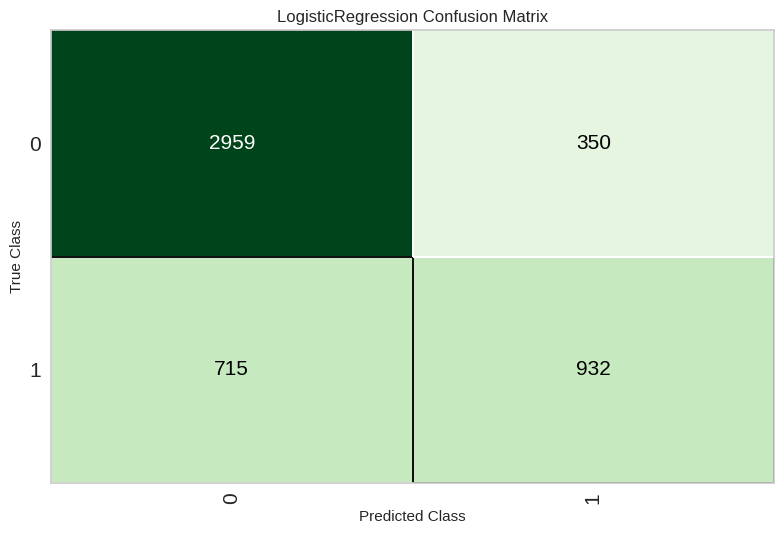

In [ ]:
plot_model(best_model, plot = 'confusion_matrix')

In [ ]:
evaluate_model(best_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [ ]:
# Code snippet 14
# Importing client data(for which the Avg Monthly Spend predictions to be made)
client_data = pd.read_csv('https://docs.google.com/spreadsheets/d/16s5TlD28DsgScenFfe7cMrzdCl75LQZA3mbOM_EekxA/pub?gid=1509803897&single=true&output=csv')
client_data.shape
client_data.head()
client_data.columns

Index([' CustomerID ', ' Title ', ' FirstName ', ' MiddleName ', ' LastName ',
       ' Suffix ', ' StreetAddress1 ', ' StreetAddress2 ',
       'City-ZipCode-State ', ' BirthDate ', ' EducationLevel ',
       ' Occupation ', ' Gender ', ' MaritalStatus ', ' HomeOwnerStatus ',
       ' NumCarsOwned ', ' NumChildrenAtHome ', ' TotalNumChildren ',
       ' AnnualIncome '],
      dtype='object')

In [ ]:
# prompt: prompt: split the column based on - delimiter use client_data and 'City-ZipCode-State ' column and store values into 'City','ZipCode','State'
# Code snippet 15
# Spliting 'City-ZipCode-State' column into 'City','ZipCode','State' columns
client_data[['City','ZipCode','State']] = client_data['City-ZipCode-State '].str.split('-',expand=True)

In [ ]:
# prompt: calculate age based on date of birth use client_data and ' BirthDate ' column and store values in 'Age'
# Code snippet 16
# Calculate age based on 'Birth Date' column
def calculate_age(born):
  today = date.today()
  return today.year - born.year - ((today.month, today.day) < (born.month, born.day))

client_data[' BirthDate '] = pd.to_datetime(client_data[' BirthDate '])
client_data['Age'] = client_data[' BirthDate '].apply(calculate_age)


In [ ]:
# Code snippet 17
# Renaming columns in test data to map with training columns
client_data.rename(columns={' StreetAddress1 ': 'Street Address1',' EducationLevel ': 'Education Level',' Occupation ': 'Occupation',
' Gender ': 'Gender',' MaritalStatus ': 'Marital Status',' HomeOwnerStatus ': 'Home Owner Status',' NumCarsOwned ': 'Number of Cars Owned',
' NumChildrenAtHome ': 'Number of Children At Home',' TotalNumChildren ': 'Total Number of Children',' AnnualIncome ': 'Annual Income'}, inplace=True)
client_data.columns

Index([' CustomerID ', ' Title ', ' FirstName ', ' MiddleName ', ' LastName ',
       ' Suffix ', 'Street Address1', ' StreetAddress2 ',
       'City-ZipCode-State ', ' BirthDate ', 'Education Level', 'Occupation',
       'Gender', 'Marital Status', 'Home Owner Status', 'Number of Cars Owned',
       'Number of Children At Home', 'Total Number of Children',
       'Annual Income', 'City', 'ZipCode', 'State', 'Age'],
      dtype='object')

In [ ]:
# Code snippet 18
# Predicting Avg Monthly Spend using the ML algorithm model
predicted_data = predict_model(best_model, client_data)

In [ ]:
# Code snippet 19
# Converting pred dataframe to a csv file
predicted_data.to_csv('Powells Book Store eBook Subscription Flags Predictions.csv')